In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn.objects as so
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv('C:/Users/Pavel/Lessen_jypyter/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2}).astype(int)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df['Embarked'] = df['Embarked'].map({'Q': 1, 'S': 2, 'C': 3}).astype(int)

In [10]:
del df['Name']

In [11]:
del df['Ticket']

In [12]:
df['Cabin'].fillna(0)

0         0
1         0
2         0
3         0
4         0
       ... 
413       0
414    C105
415       0
416       0
417       0
Name: Cabin, Length: 418, dtype: object

In [13]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x : x.fillna(x.median()))

In [14]:
df['Fare'] = df['Fare'].fillna(value= 13.913030)

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
titanic = df.fillna(0)

In [17]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0,3,1,34.5,0,0,7.8292,0,1
1,893,1,3,2,47.0,1,0,7.0000,0,2
2,894,0,2,1,62.0,0,0,9.6875,0,1
3,895,0,3,1,27.0,0,0,8.6625,0,2
4,896,1,3,2,22.0,1,1,12.2875,0,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,24.0,0,0,8.0500,0,2
414,1306,1,1,2,39.0,0,0,108.9000,C105,3
415,1307,0,3,1,38.5,0,0,7.2500,0,2
416,1308,0,3,1,24.0,0,0,8.0500,0,2


In [18]:
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: 1 if x != 0 else 0)

In [19]:
df['Cabin'] = (df['Cabin'] != 0).astype(int)

In [20]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0,3,1,34.5,0,0,7.8292,0,1
1,893,1,3,2,47.0,1,0,7.0000,0,2
2,894,0,2,1,62.0,0,0,9.6875,0,1
3,895,0,3,1,27.0,0,0,8.6625,0,2
4,896,1,3,2,22.0,1,1,12.2875,0,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,24.0,0,0,8.0500,0,2
414,1306,1,1,2,39.0,0,0,108.9000,1,3
415,1307,0,3,1,38.5,0,0,7.2500,0,2
416,1308,0,3,1,24.0,0,0,8.0500,0,2


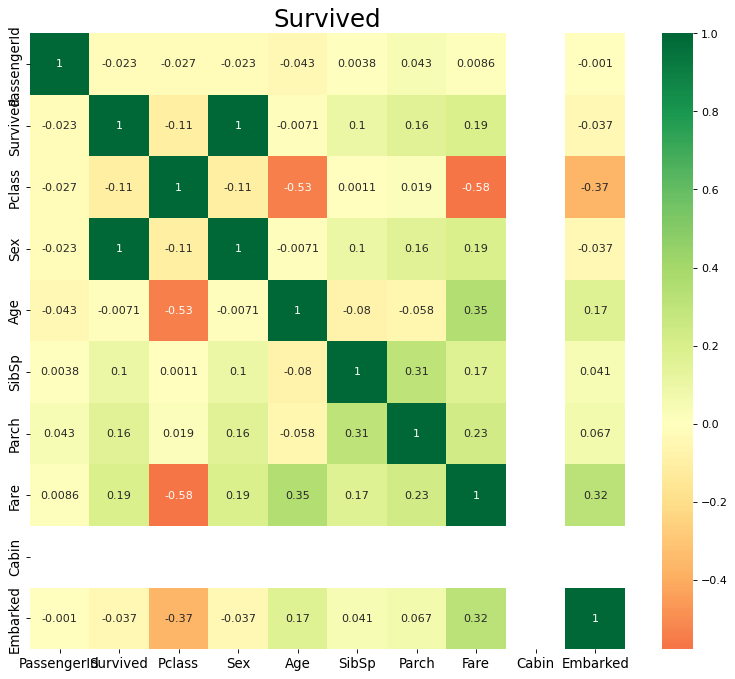

In [21]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Survived', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

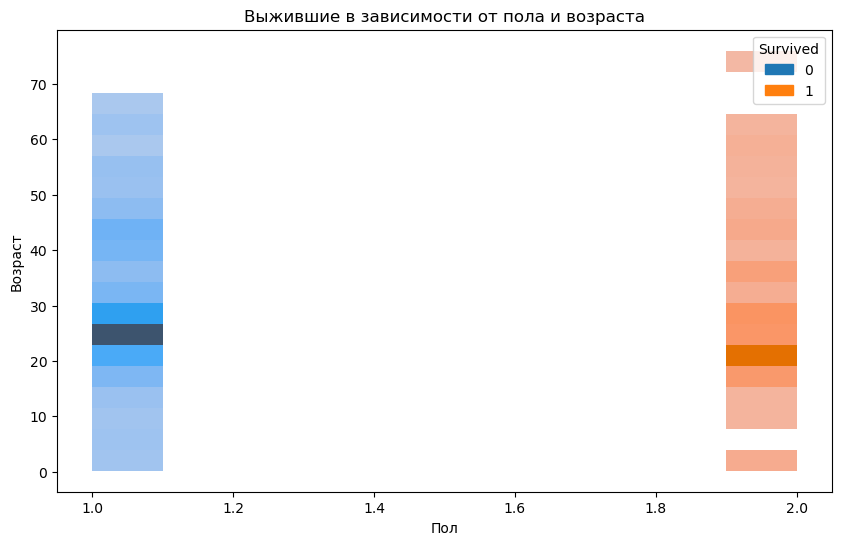

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x="Sex",y = 'Age', hue="Survived")
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.title('Выжившие в зависимости от пола и возраста')
plt.show()

In [23]:
x = titanic.drop(columns=["Survived"])
y = titanic["Survived"]

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42)

In [25]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
336,1228,2,1,32.0,0,0,13.0000,0,2
31,923,2,1,24.0,2,0,31.5000,0,2
84,976,2,1,28.0,0,0,10.7083,0,1
287,1179,1,1,24.0,1,0,82.2667,1,2
317,1209,2,1,19.0,0,0,10.5000,0,2
...,...,...,...,...,...,...,...,...,...
71,963,3,1,21.0,0,0,7.8958,0,2
106,998,3,1,21.0,0,0,7.8208,0,1
270,1162,1,1,46.0,0,0,75.2417,1,3
348,1240,2,1,24.0,0,0,13.5000,0,2


In [26]:
reg = LogisticRegression(max_iter = 5000).fit(X_train, y_train)

In [27]:
reg.coef_

array([[-2.13291612e-04, -1.00684519e-01,  6.29352727e+00,
        -4.41252466e-03,  4.89339320e-02,  7.43610924e-02,
         3.00427798e-03,  1.57144275e-01, -2.17285080e-01]])

In [28]:
reg.intercept_

array([-8.91835721])

In [29]:
reg.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [30]:
y_predict = reg.predict(X_test)
y_true = titanic.loc[X_test.index, "Survived"] 
err = y_true - y_predict
new_list = list(err)

In [31]:
y_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [32]:
reg.score(X_train, y_train)

1.0

In [33]:
acc_log_train = round(reg.score(X_train, y_train)*100) 
acc_log_test = round(reg.score(X_test,y_test)*100)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 100
Testing Accuracy: % 100


In [34]:
reg.score(X_test, y_test)

1.0

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [36]:
accuracy_score(y_true, y_predict)

1.0

In [37]:
f1_score(y_true, y_predict, average=None)

array([1., 1.])

In [50]:
mae = mae_score(y_test, y_predict)
mae

np.float64(0.0)

In [52]:
mse = mse_score(y_test, y_predict)
mse

np.float64(0.0)